## Advance EDA

In this notebook we will be Drawing out various insights, plot useful visualizations and also derieve some new features if needed

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from scipy.stats.stats import pearsonr   
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
import jsonpickle
import json

In [2]:
data = pd.read_csv('Data/Preprocessed/clean_data.csv', index_col= None)

In [3]:
data

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,...,Savings_account_balance,Property,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent,average_employed_years
0,4.219508,1,4,0,1,6,13.971660,4,0,0,...,0,0,0,1,0,0,1,1,0,1.609438
1,3.135494,1,2,0,1,48,15.599070,2,0,0,...,1,0,0,0,1,0,0,1,0,1.252763
2,3.912023,2,3,1,1,12,14.555542,2,0,0,...,1,0,1,1,0,0,1,1,0,1.871802
3,3.828641,2,4,0,1,42,15.880092,2,0,1,...,1,1,2,1,0,0,1,0,0,1.871802
4,3.988984,2,4,0,1,24,15.398605,3,0,0,...,1,2,3,1,0,0,1,0,0,1.252763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.465736,1,4,1,1,12,14.367095,3,0,0,...,1,0,2,0,1,0,0,1,0,1.871802
996,3.713572,1,4,2,1,30,15.165400,4,0,0,...,1,1,4,1,0,0,0,1,0,1.252763
997,3.663562,1,4,0,1,12,13.597356,4,0,0,...,1,2,0,1,0,0,1,1,0,1.609438
998,3.178054,1,4,0,1,45,14.427990,4,0,0,...,1,2,0,1,0,0,1,0,0,1.252763


In [4]:
target = data['high_risk_applicant']

# Bivariate Analysis

Why spearman correlation and why not pearson?

Because Person only considers linear relationship among the variables that is it looks only for a constant increase/decrease with respect to the other variable.

Where as spearman also, takes care of monotonic relationships

<AxesSubplot:>

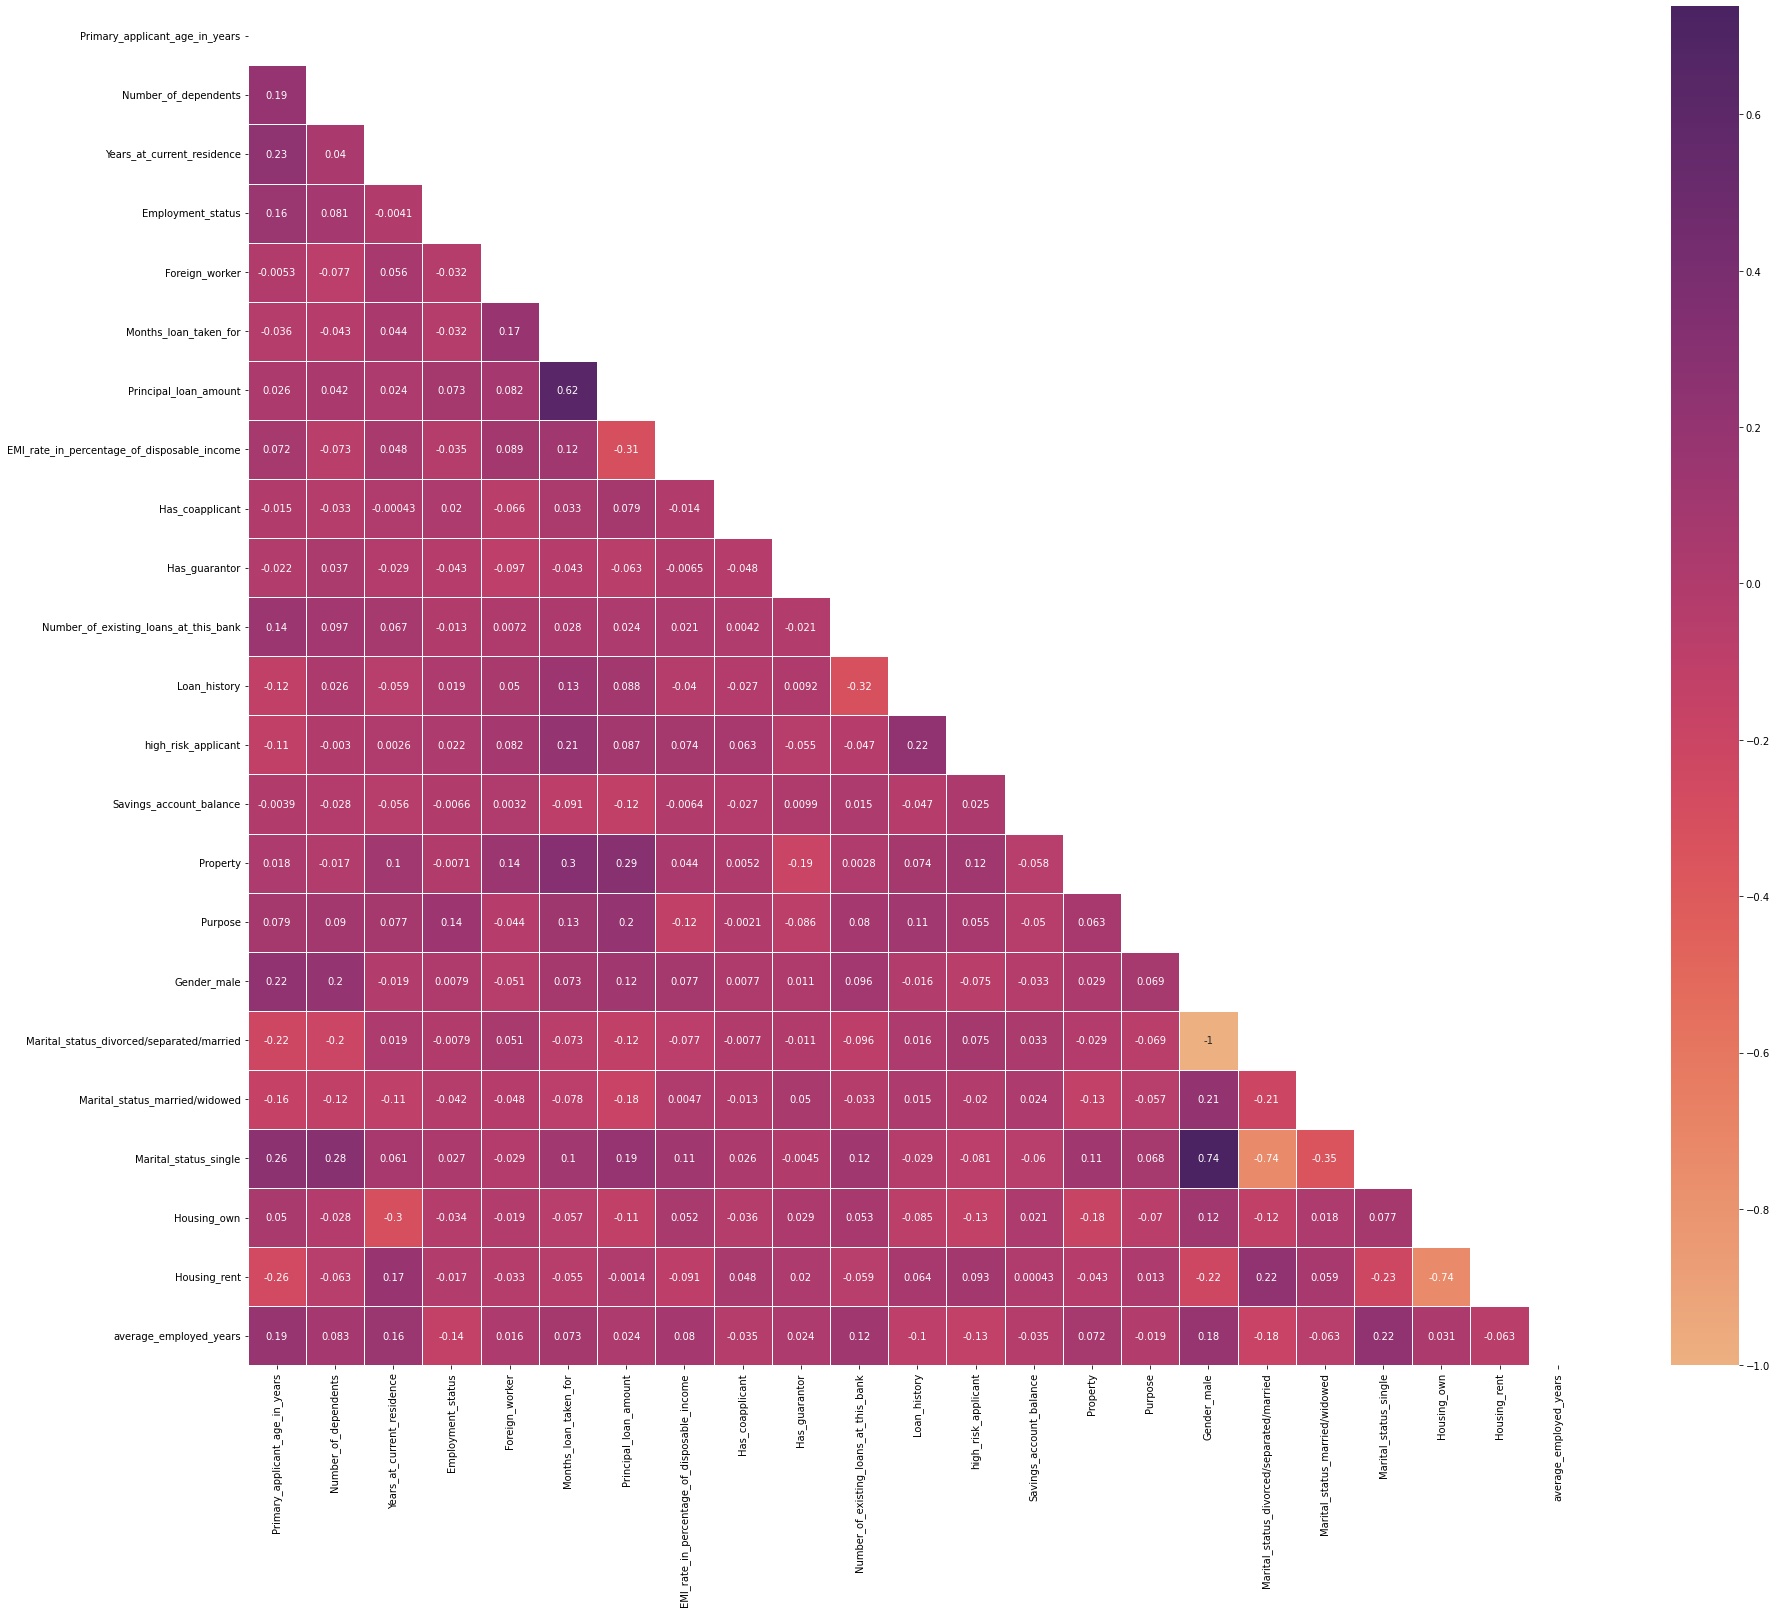

In [5]:
figure(figsize=(30, 25))
mask = np.zeros_like(data.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

## Some Conclusions Drawn

<li>Risk is directly affected by the applicants History.</li>
<li>Males have more people   dependant on them </li>
<li>There are more single males applying for loan😅</li>

#### Now we will be considering a lot of new features and see how they affect the target feature

1. Interest Paid

Interest paid = (Principal * number of years * Rate)/100

In [6]:
data.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Months_loan_taken_for', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant',
       'Has_guarantor', 'Number_of_existing_loans_at_this_bank',
       'Loan_history', 'high_risk_applicant', 'Savings_account_balance',
       'Property', 'Purpose', 'Gender_male',
       'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years'],
      dtype='object')

In [7]:
interest_paid = (data['EMI_rate_in_percentage_of_disposable_income']*data['Principal_loan_amount']*(data['Months_loan_taken_for']/12) )/100

In [8]:
interest_paid

0      0.279433
1      1.247926
2      0.291111
3      1.111606
4      0.923916
         ...   
995    0.431013
996    1.516540
997    0.543894
998    2.164199
999    1.725338
Length: 1000, dtype: float64

In [9]:
pearsonr(interest_paid, target)

(0.20893702094146974, 2.5116648655210183e-11)

Since, the correlation is suffieciently low we can add this column to our dataset 

In [10]:
data['interest_paid'] = interest_paid

Check Weather is is normally distributed

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='interest_paid', ylabel='Density'>

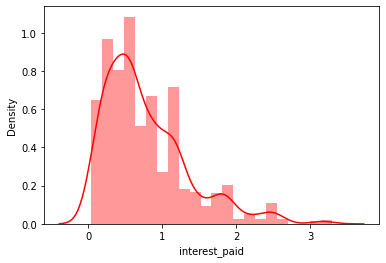

In [11]:
sns.distplot(data['interest_paid'], color = 'r')

In [12]:

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

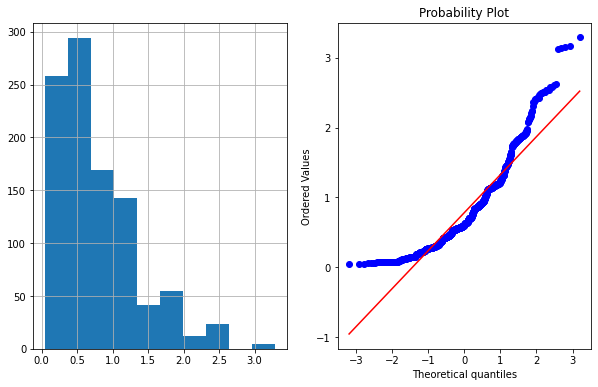

In [13]:
plot_data(data,'interest_paid' )

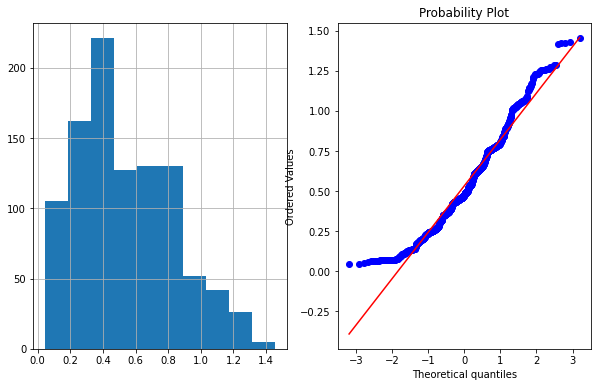

In [14]:
data['interest_paid'] = np.log1p(data['interest_paid'])
plot_data(data, 'interest_paid')

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='interest_paid', ylabel='Density'>

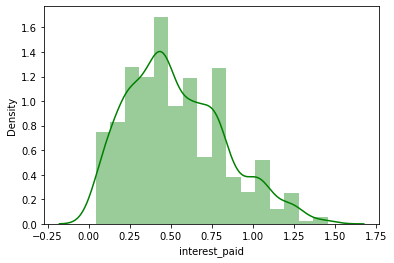

In [15]:
sns.distplot(data['interest_paid'], color = 'g')

Now it seems comparatively more normal, we can bring it to exact normal distribution by a series of log transformation but it would be prone to big statistical blunders

In [16]:
def plot_correlations_of_new_variable(new_var, df):
    corre = {}
    for i in df.columns:
        if i != new_var:
            coeff, p= pearsonr(df[new_var],df[i])
            corre[i]= coeff
    fig = plt.figure(figsize=(10, 5))
    
    values= [i for i in corre.values() if i >0.2 or i<-0.2]    
    keys = [key for key, value in corre.items() if value in values ]
    
        
    
    
    

   
   
# creating the bar plot
    sns.set(rc={'figure.figsize':(25,10)})
    sns.barplot(y = keys, x=values, palette="Blues_d").set(title = f'correlation against {new_var}')
    

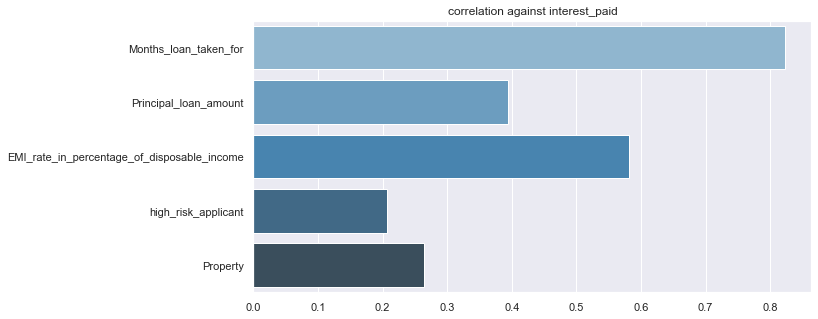

In [17]:
plot_correlations_of_new_variable('interest_paid', data)

As we can see the Parameters used to construct the feature are significnatly related to the interest and hence, these 3 columns can be easily removed.

In [18]:
data_with_interest = data.drop(['Months_loan_taken_for', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income'],axis = 1 )

In [19]:
data_with_interest

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,...,Property,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent,average_employed_years,interest_paid
0,4.219508,1,4,0,1,0,0,2,0,0,...,0,0,1,0,0,1,1,0,1.609438,0.246417
1,3.135494,1,2,0,1,0,0,1,1,1,...,0,0,0,1,0,0,1,0,1.252763,0.810008
2,3.912023,2,3,1,1,0,0,1,0,0,...,0,1,1,0,0,1,1,0,1.871802,0.255503
3,3.828641,2,4,0,1,0,1,1,1,0,...,1,2,1,0,0,1,0,0,1.871802,0.747449
4,3.988984,2,4,0,1,0,0,2,2,1,...,2,3,1,0,0,1,0,0,1.252763,0.654363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.465736,1,4,1,1,0,0,1,1,0,...,0,2,0,1,0,0,1,0,1.871802,0.358382
996,3.713572,1,4,2,1,0,0,1,1,0,...,1,4,1,0,0,0,1,0,1.252763,0.922885
997,3.663562,1,4,0,1,0,0,1,1,0,...,2,0,1,0,0,1,1,0,1.609438,0.434308
998,3.178054,1,4,0,1,0,0,1,1,1,...,2,0,1,0,0,1,0,0,1.252763,1.151900


### Looking at some other Variables

In [20]:
data_with_interest.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Savings_account_balance', 'Property', 'Purpose',
       'Gender_male', 'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years',
       'interest_paid'],
      dtype='object')

In [21]:
data_with_interest

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,...,Property,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent,average_employed_years,interest_paid
0,4.219508,1,4,0,1,0,0,2,0,0,...,0,0,1,0,0,1,1,0,1.609438,0.246417
1,3.135494,1,2,0,1,0,0,1,1,1,...,0,0,0,1,0,0,1,0,1.252763,0.810008
2,3.912023,2,3,1,1,0,0,1,0,0,...,0,1,1,0,0,1,1,0,1.871802,0.255503
3,3.828641,2,4,0,1,0,1,1,1,0,...,1,2,1,0,0,1,0,0,1.871802,0.747449
4,3.988984,2,4,0,1,0,0,2,2,1,...,2,3,1,0,0,1,0,0,1.252763,0.654363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.465736,1,4,1,1,0,0,1,1,0,...,0,2,0,1,0,0,1,0,1.871802,0.358382
996,3.713572,1,4,2,1,0,0,1,1,0,...,1,4,1,0,0,0,1,0,1.252763,0.922885
997,3.663562,1,4,0,1,0,0,1,1,0,...,2,0,1,0,0,1,1,0,1.609438,0.434308
998,3.178054,1,4,0,1,0,0,1,1,1,...,2,0,1,0,0,1,0,0,1.252763,1.151900


<AxesSubplot:ylabel='Frequency'>

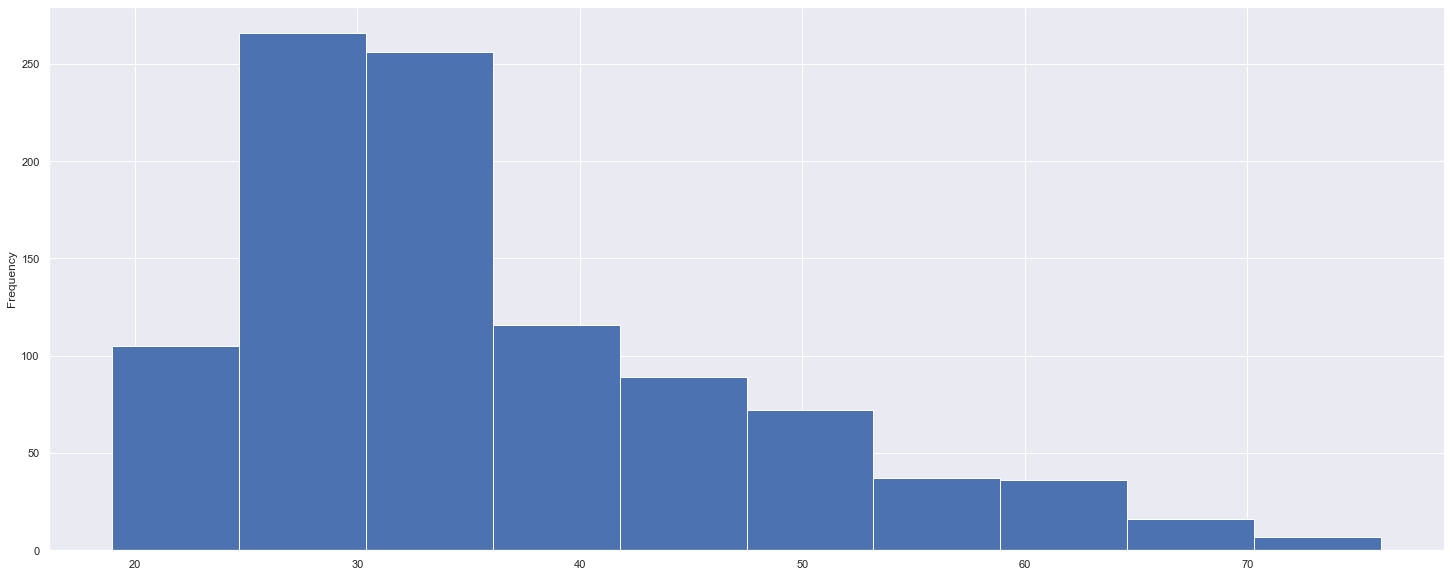

In [22]:
data_with_interest['Age'] = np.exp(data_with_interest['Primary_applicant_age_in_years']).astype('int')
data_with_interest['Age'].plot.hist()

<b>We will segment the applicants based upon various features  and check which type of people are more creditworthy</b>

#### Based Upon Age

In [23]:
is_young = []
for i in data_with_interest['Age']:
    if i >=60:
        is_young.append(0)
    else:is_young.append(1)
data_with_interest['is_young'] = is_young

Now we shall check how many young people have actually paid back loan

In [24]:
data_with_interest

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,...,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent,average_employed_years,interest_paid,Age,is_young
0,4.219508,1,4,0,1,0,0,2,0,0,...,1,0,0,1,1,0,1.609438,0.246417,68,0
1,3.135494,1,2,0,1,0,0,1,1,1,...,0,1,0,0,1,0,1.252763,0.810008,23,1
2,3.912023,2,3,1,1,0,0,1,0,0,...,1,0,0,1,1,0,1.871802,0.255503,49,1
3,3.828641,2,4,0,1,0,1,1,1,0,...,1,0,0,1,0,0,1.871802,0.747449,46,1
4,3.988984,2,4,0,1,0,0,2,2,1,...,1,0,0,1,0,0,1.252763,0.654363,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.465736,1,4,1,1,0,0,1,1,0,...,0,1,0,0,1,0,1.871802,0.358382,32,1
996,3.713572,1,4,2,1,0,0,1,1,0,...,1,0,0,0,1,0,1.252763,0.922885,41,1
997,3.663562,1,4,0,1,0,0,1,1,0,...,1,0,0,1,1,0,1.609438,0.434308,38,1
998,3.178054,1,4,0,1,0,0,1,1,1,...,1,0,0,1,0,0,1.252763,1.151900,24,1


In [25]:
def plot_pie_chart(df, title, label1 = 'Risky', label2= 'Creditworthy', feature = 'high_risk_applicant'):
    label = [label1, label2]
    colors = ['#0474a3', '#f3bc04']
    try:
        if len(df[feature].value_counts()) ==2:
                plt.pie(df[feature].value_counts(), labels=label,
                autopct='%1.1f%%', pctdistance=0.85, shadow= True, colors = colors)
        else:
                plt.pie(df[feature].value_counts(),
                autopct='%1.1f%%', pctdistance=0.85, shadow= True, colors = colors)
    except:
            print('Exception in plotting a pie chart')
           

    donut_plot = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    plt.title(title, fontdict={'size':20})
    fig.gca().add_artist(donut_plot)
    
    
    
    
def plot_pie_charts(dfs,  titles,  Title, label1 = 'Risky', label2= 'Creditworthy', feature = 'high_risk_applicant'):
        
        figure(figsize=(24, 16))
        for i in range(len(dfs)):
                if len(dfs) %2 ==0:
                        plt.subplot(2, 2, i+1)
                else:
                         plt.subplot(3, 3, i+1)
                plot_pie_chart(dfs[i], titles[i], label1, label2,  feature)
        plt.suptitle(Title, horizontalalignment = 'center', fontsize = 30)
                
                

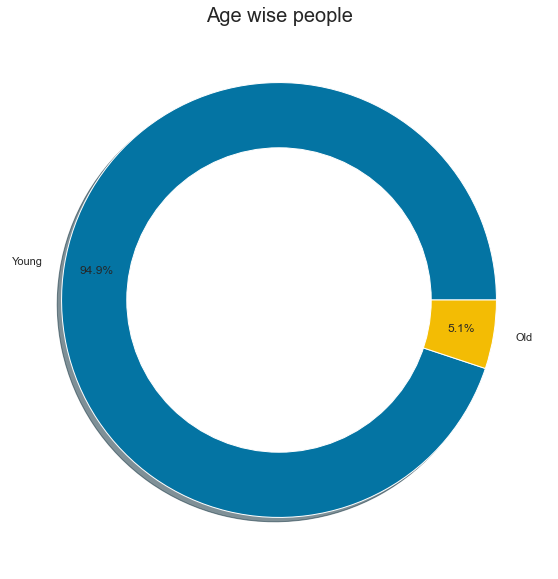

In [26]:
plot_pie_chart(data_with_interest, title= 'Age wise people', label1= 'Young', label2= 'Old', feature= 'is_young')

In [27]:
young_people = data_with_interest[data_with_interest['is_young'] ==1]
old_people = data_with_interest[data_with_interest['is_young'] ==0]

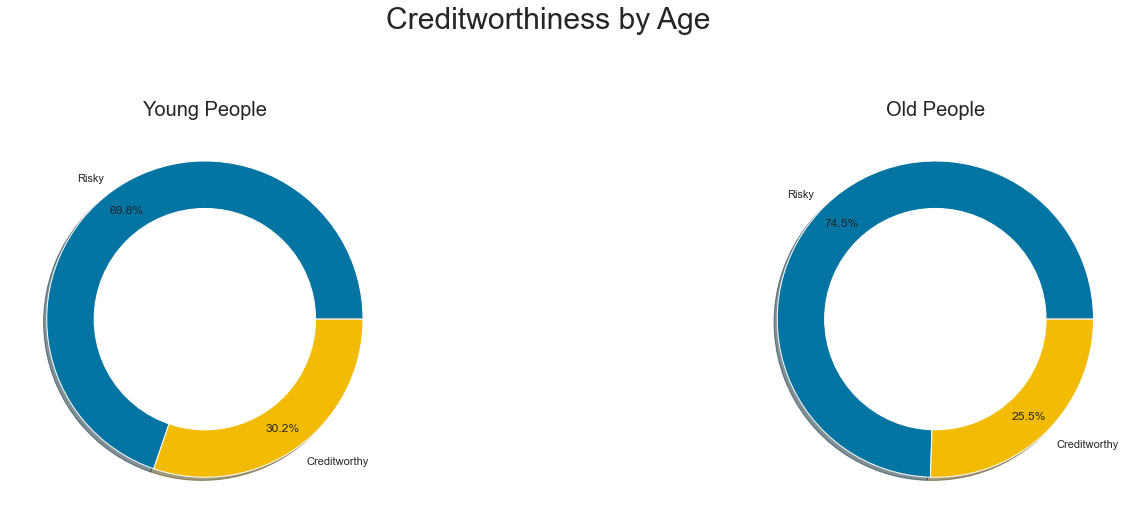

In [28]:
plot_pie_charts([young_people, old_people], ['Young People', 'Old People'], 'Creditworthiness by Age')

<b>From the Above Charts We can Conclude that Young peple are more creditworthy</b>

#### Based Upon Residence

In [29]:
foriegn_worker = data_with_interest[data_with_interest['Foreign_worker'] ==1]
Native_worker = data_with_interest[data_with_interest['Foreign_worker'] ==0]

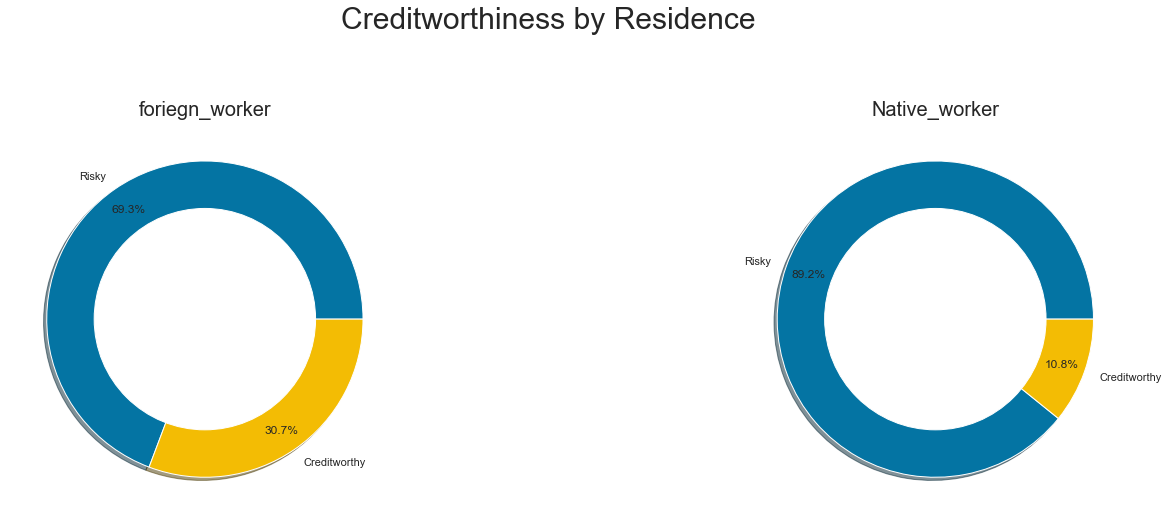

In [30]:
plot_pie_charts([foriegn_worker, Native_worker], ['foriegn_worker', 'Native_worker'], 'Creditworthiness by Residence')

<b>From the Above Charts We can Conclude that Foreign Workers are more creditworthy</b>

#### Based Upon Gurantor

In [31]:
has_gurantor = data_with_interest[data_with_interest['Has_guarantor'] ==1]
No_gurantor  = data_with_interest[data_with_interest['Has_guarantor'] ==0]

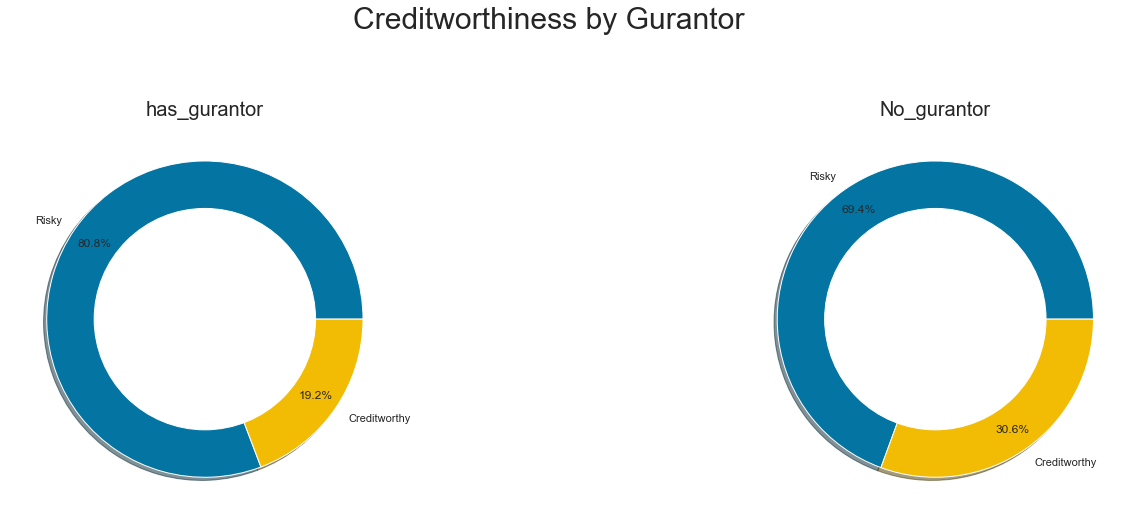

In [32]:
plot_pie_charts([has_gurantor , No_gurantor], ['has_gurantor', 'No_gurantor'], 'Creditworthiness by Gurantor')

#### Based Upon Number of Credit accounts

<b>From the Above Charts We can Conclude that people not having  Gurantors are more creditworthy</b>

<AxesSubplot:>

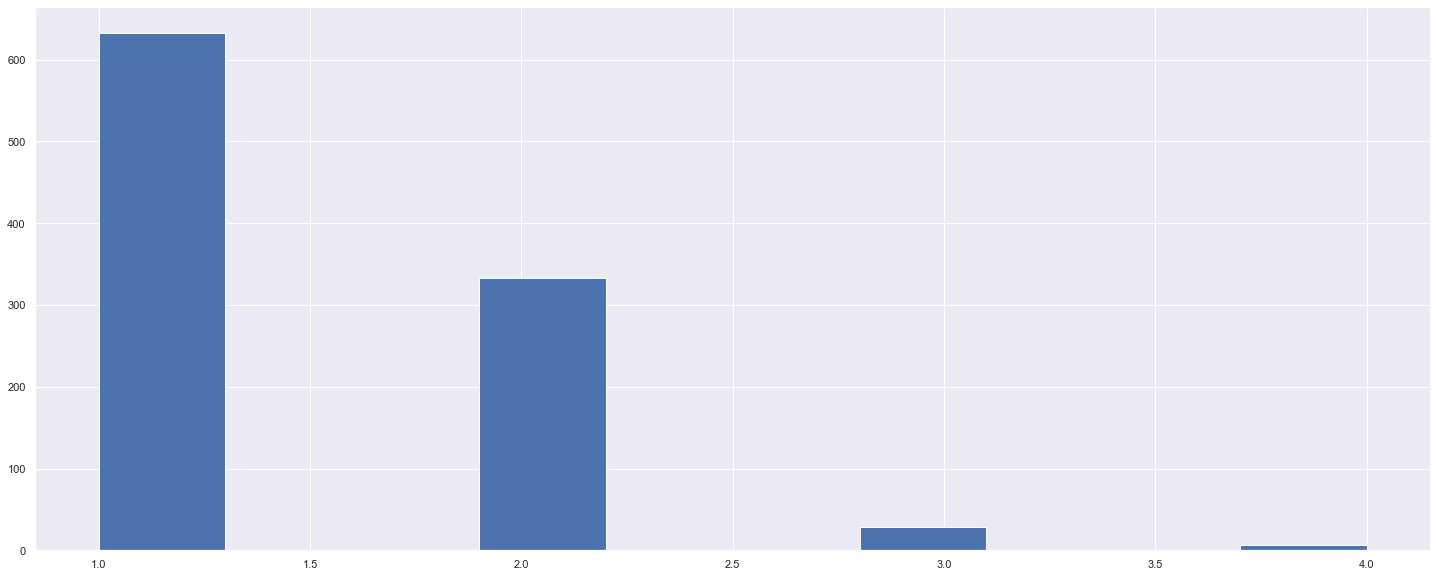

In [33]:
data_with_interest['Number_of_existing_loans_at_this_bank'].hist()

In [34]:
credit_accounts = []
titles = []
for i in range(1, 5):
    
   credit_accounts.append(data_with_interest[data_with_interest['Number_of_existing_loans_at_this_bank'] ==i])
   titles.append(f'Number of credit accounts {i}')

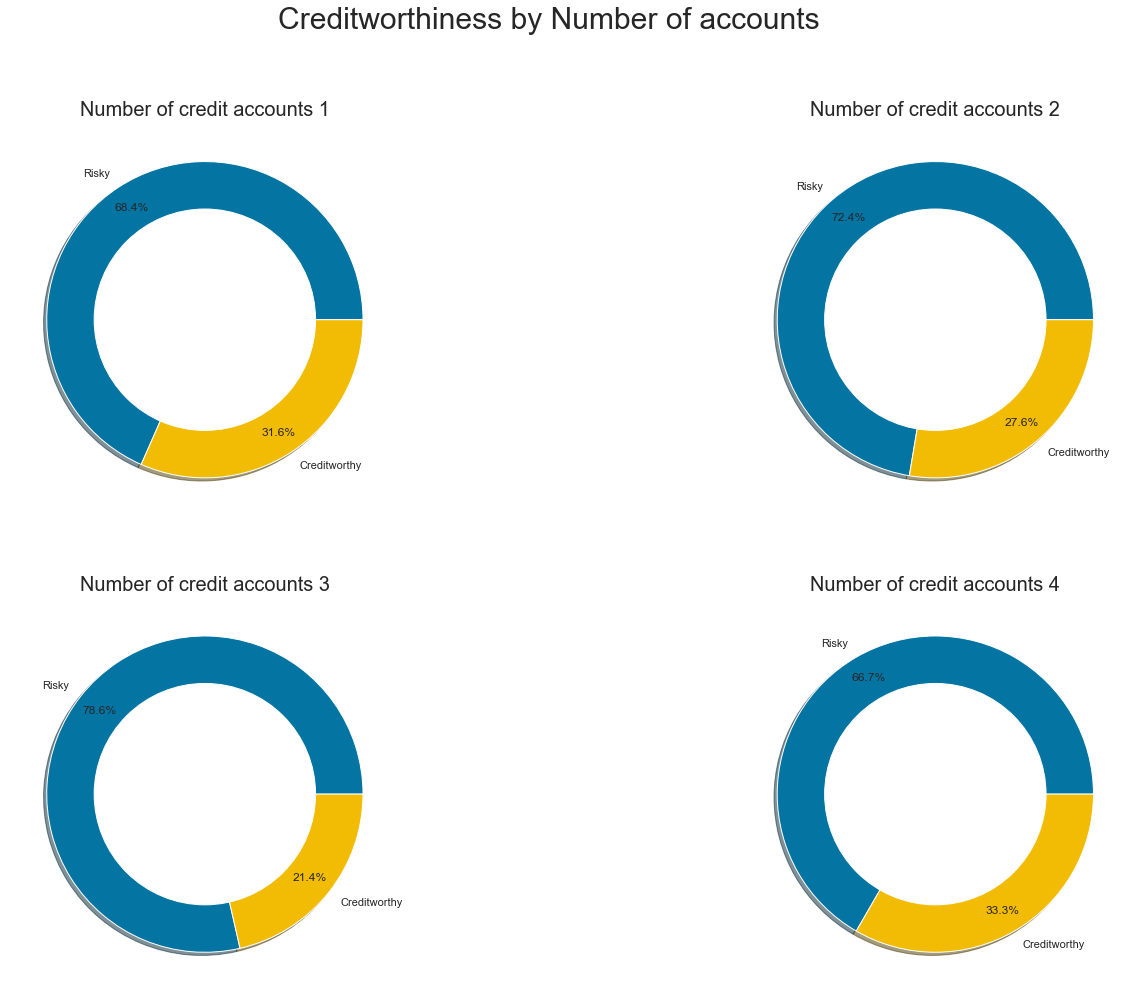

In [35]:
plot_pie_charts(credit_accounts, titles, 'Creditworthiness by Number of accounts')

<b> From the above charts we can conclude that people with lesser number of credit accounts are more creditworthy</b>

#### Based on credit history

In [36]:
with open('lables.json', 'r') as f:
    data1 = f.read()
decodedSet = jsonpickle.decode(data1)
decodedSet

'{"lables": [{"py/object": "pandas.core.indexes.base.Index", "_data": {"py/reduce": [{"py/function": "numpy.core.multiarray._reconstruct"}, {"py/tuple": [{"py/type": "numpy.ndarray"}, {"py/tuple": [0]}, {"py/b64": "Yg=="}]}, {"py/tuple": [1, {"py/tuple": [4]}, {"py/reduce": [{"py/type": "numpy.dtype"}, {"py/tuple": ["O8", false, true]}, {"py/tuple": [3, "|", null, null, null, -1, -1, 63]}]}, false, ["skilled employee / official", "unskilled - resident", "management / self-employed / highly qualified employee / officer", "unemployed / unskilled - non-resident"]]}]}, "_index_data": {"py/id": 3}, "_name": null, "_cache": {}, "_id": {"py/object": "builtins.object"}, "py/seq": ["skilled employee / official", "unskilled - resident", "management / self-employed / highly qualified employee / officer", "unemployed / unskilled - non-resident"]}, {"py/object": "pandas.core.indexes.base.Index", "_data": {"py/reduce": [{"py/function": "numpy.core.multiarray._reconstruct"}, {"py/tuple": [{"py/type":

In [37]:
history = ["critical/pending loans at other banks", "existing loans paid back duly till now", "delay in paying off loans in the past", "no loans taken/all loans paid back duly", "all loans at this bank paid back duly"]

From the above credit titltes we can conclude that histories with even index have a negative sentiment while with odd indexes have positive sentiment. Hence, we will segment the applicants on this parameter.

In [38]:
loan_histories= []
titles = []
for i in range(0, 4):
   loan_histories.append(data_with_interest[data_with_interest['Loan_history'] ==i])
   titles.append(history[i])

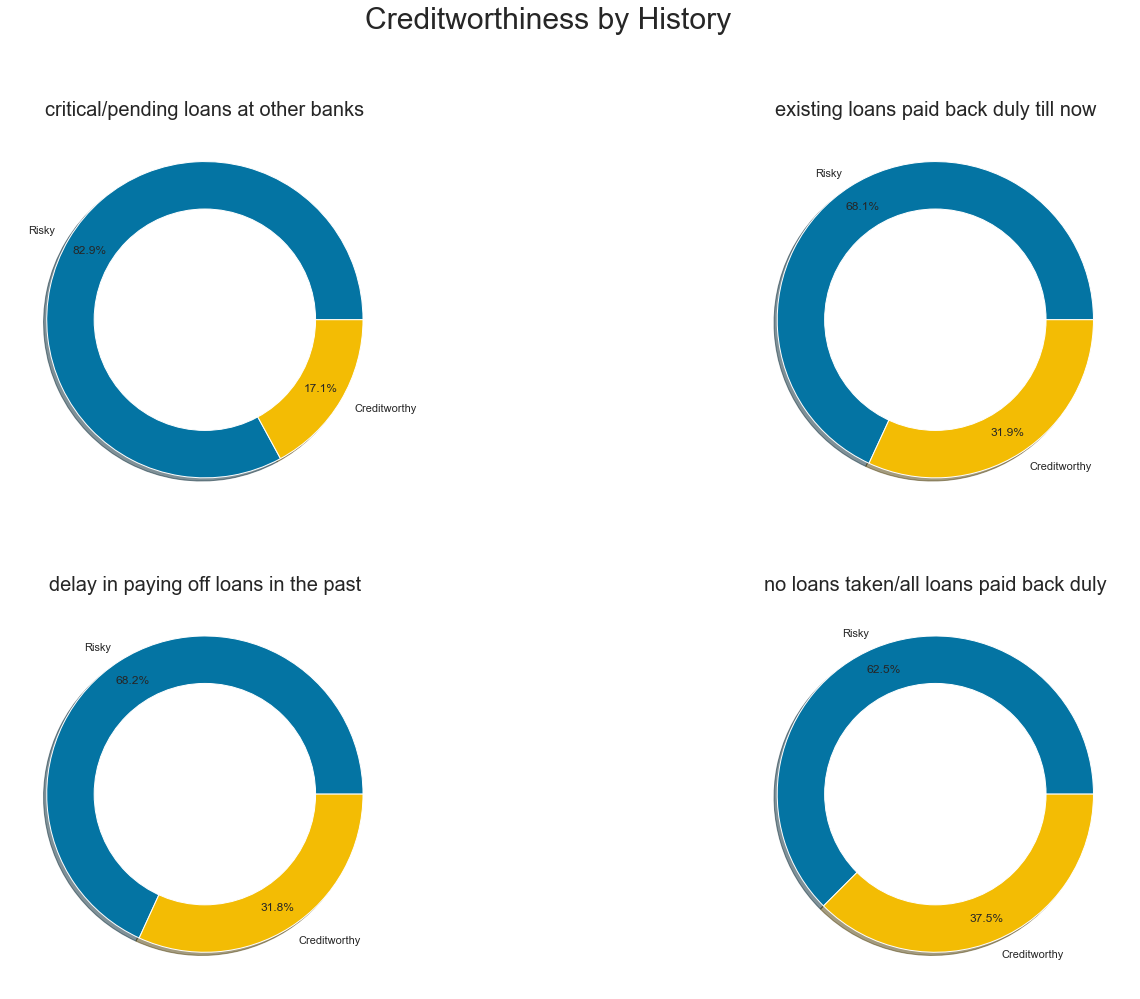

In [39]:
plot_pie_charts(loan_histories, titles, 'Creditworthiness by History')

<b>From the above charts we can conlcude that the loan history is also a significant feature and people who have pending loans with other banks must be avoided.</b>

#### 

#### Based upon Employement Status

In [40]:
status  =  ["skilled employee / official", "unskilled - resident", "management / self-employed / highly qualified employee / officer", "unemployed / unskilled - non-resident"]

employement_status= []
titles = []
for i in range(0, 4):
   employement_status.append(data_with_interest[data_with_interest['Employment_status'] ==i])
   titles.append(status[i])

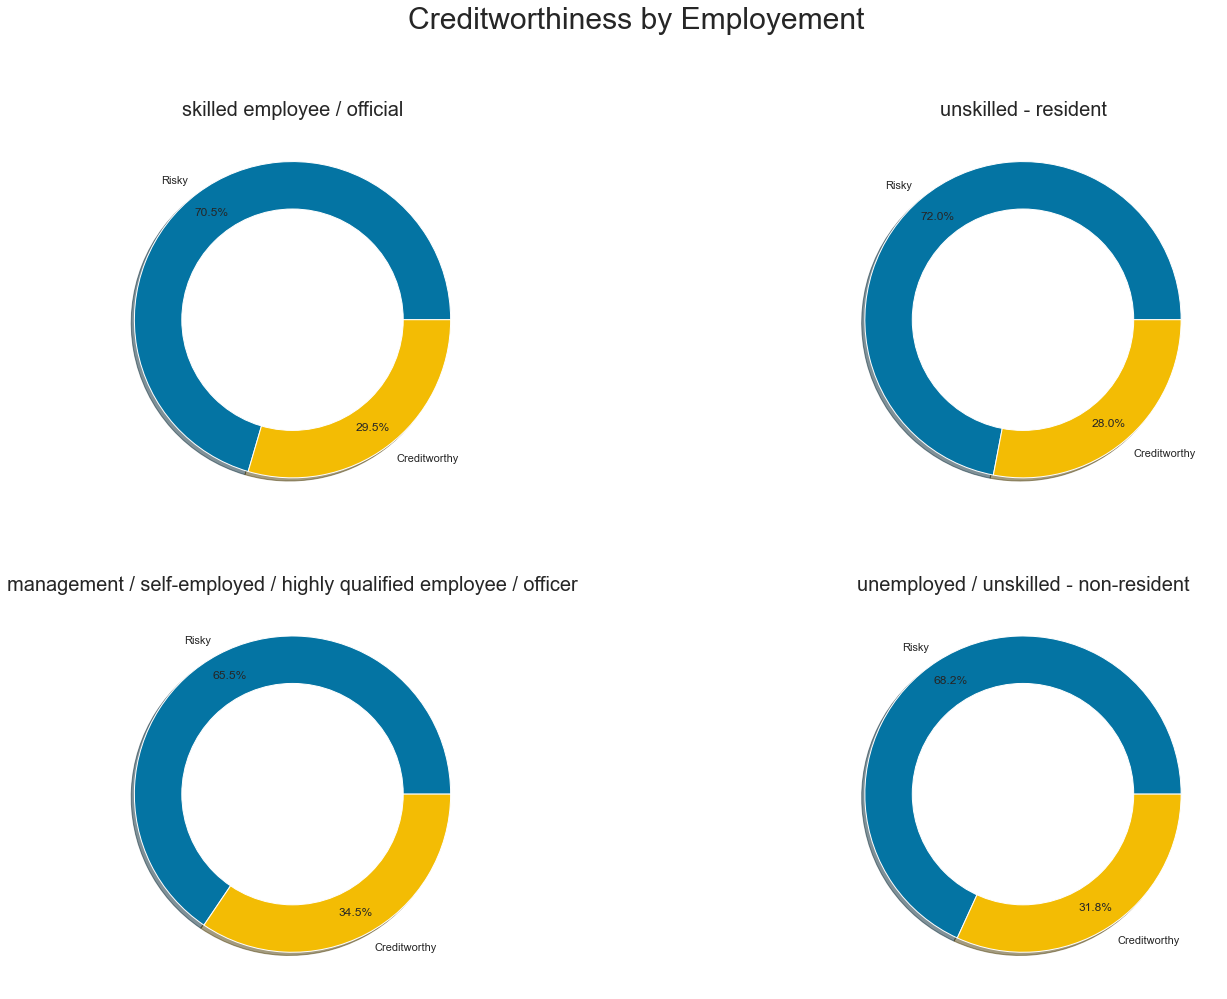

In [41]:
plot_pie_charts(employement_status, titles, 'Creditworthiness by Employement')

From the above chart we can conclude that Unskilled employees should be avoided since they are less creditworthy

#### Based upon Coapplicant

In [42]:
has_coapplicant= data_with_interest[data_with_interest['Has_coapplicant'] ==1]
no_copplicant = data_with_interest[data_with_interest['Has_coapplicant'] ==0]

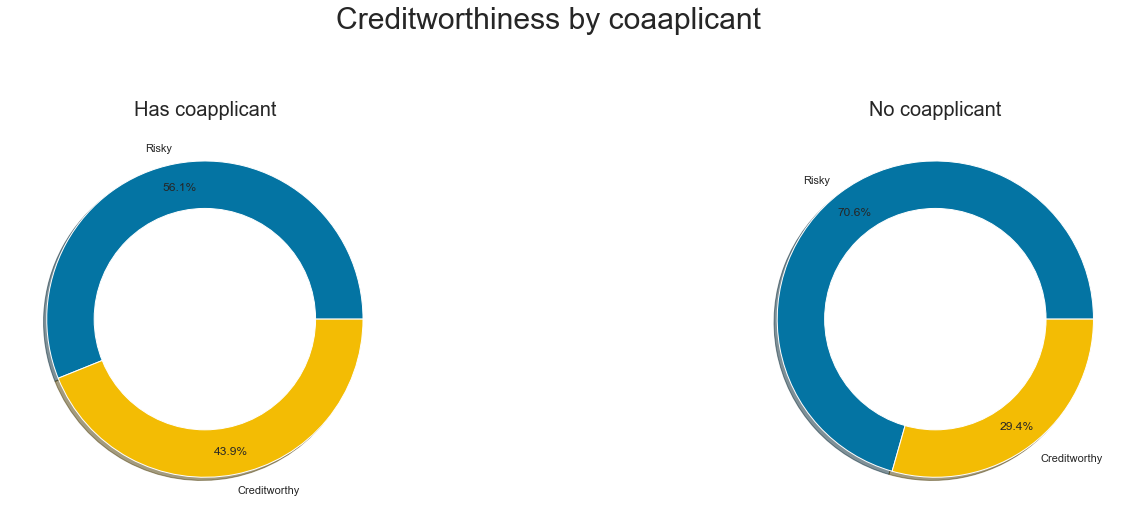

In [43]:
plot_pie_charts([has_coapplicant, no_copplicant],['Has coapplicant', 'No coapplicant'], 'Creditworthiness by coaaplicant')

<b>Hence, from above chart we can conclue that having a copplicnat is more creditoworthy</b>

#### Based upon Purpose

In [44]:
purposes= ["electronic equipment", "education", "FF&E", "new vehicle", "used vehicle", "business", "domestic appliances", "repair costs", "career development"]

Purpose = []
titles = []
for i in range(0, 9):
   Purpose.append(data_with_interest[data_with_interest['Purpose'] ==i])
   titles.append(purposes[i])

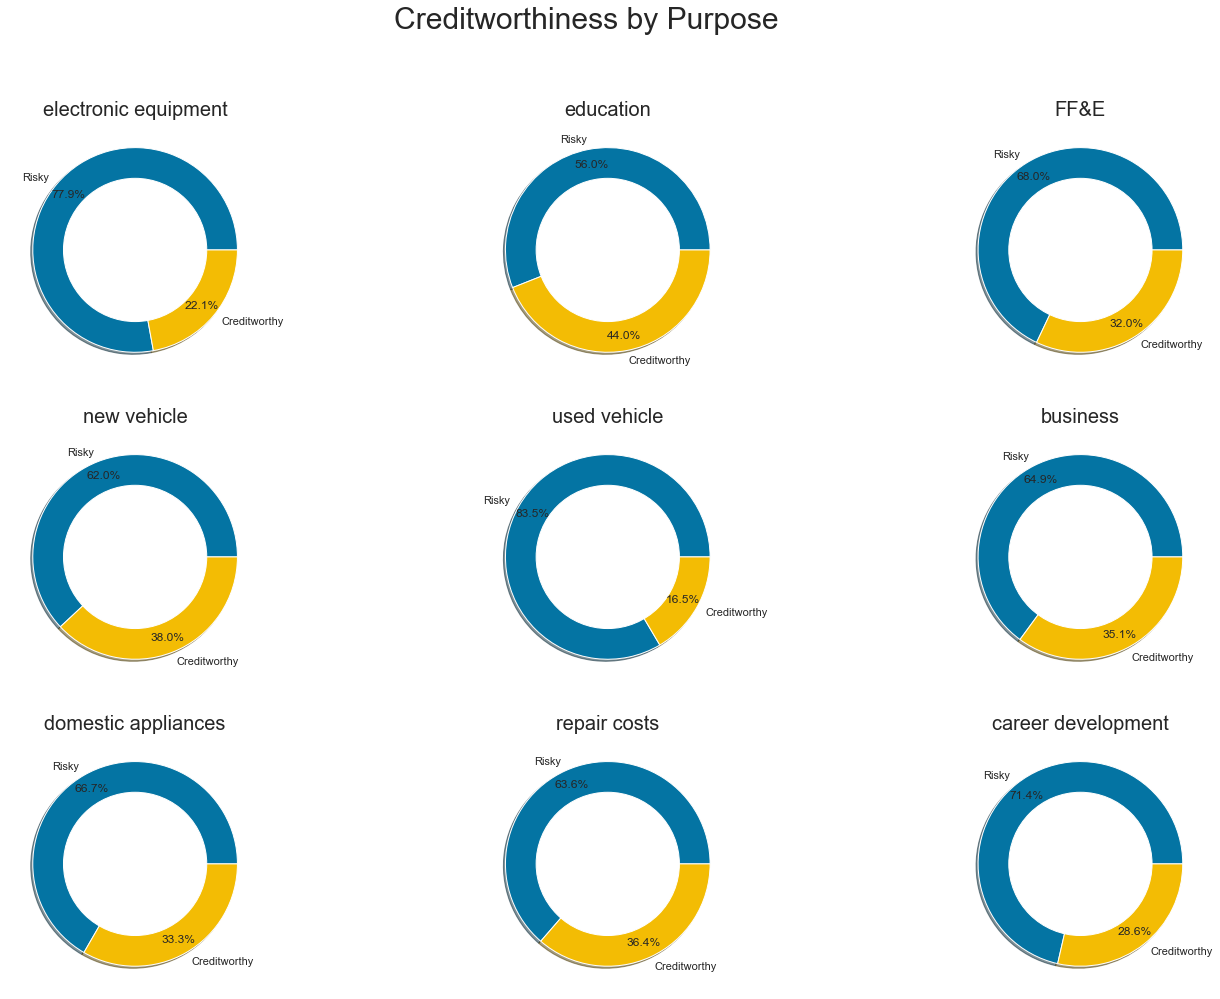

In [45]:
plot_pie_charts(Purpose , titles, 'Creditworthiness by Purpose')

<li>Education loans have the least probability of being default followed by new vehicle and loans taken for used vehicles, and electronics vehicle are at higher risks<li>

## Conclusions

<li>Education loans have the least probability of being default followed by new vehicle and loans taken for used vehicles, and electronics vehicle are at higher risks</li>

<li>Unskilled employees should be avoided since they are less creditworthy</li>

<li>The loan history is also a significant feature and people who have pending loans with other banks must be avoided.</li>

<li>As you can see High risk is  related to interest paid and longer loan duration. Hence, we can conlclude that giving loan with higher interests or for longer duration increases the risk.</li>

<li>Young people tend to take more loans and are more creditworthy than old people.</li>

<li> Having a copplicnat is more creditoworthy</li>
<li>Foriegn Workers are more creditwohthy as compared to native workers.</li>

<li>Surprisingly, People <b>not</b> having gurantor are more aslo more creditoworthy.</li>

<li> People with lesser number of credit accounts are more creditworthy</li>



### Credit score derivation

From the above conclusions we cab derive something like credit score, which we consider all above points. The credit score will be responsible parameter for deciding the approval of the application

Credit score = [Loan Purpose +  skilled + good history + comparratively shorter duration + young + foreign worker - gurantor + no. of credit accounts + has_copplicant]

<li> if loan purpose is in top 4 most creditworthy purposes we will add one to credit score</li>
<li> if the applicant is skilled we will add one point</li>
<li> Loan history gets 1 point</li>
<li>similarly we add other parameters</li>
<li>since gurantor is inversly prpotional we will substract it.</li>


In [46]:
purpose_credit  = []
skill_credit    = []
history_credit  = []
duration_credit = []
for i in data_with_interest['Purpose']:
    if i < 4:
        purpose_credit.append(1)
    else:
        purpose_credit.append(0)   

for i in data_with_interest['Employment_status']:
    if i == 1:
        skill_credit.append(1)
    else:
        skill_credit.append(0)   
        
for i in data_with_interest['Loan_history']:
    if i%2 ==  0:
        history_credit.append(1)
    else:
        history_credit.append(0)   
for i in data['Months_loan_taken_for']:
    if i<50:
        duration_credit.append(1)
    else:
        duration_credit.append(0) 

data_with_interest['purpose_credit'] = purpose_credit
data_with_interest['skill_credit'] = skill_credit
data_with_interest['history_credit'] = history_credit
data_with_interest['duration_credit'] = duration_credit

In [47]:
data_with_interest['credit_score'] = data_with_interest['purpose_credit']  + data_with_interest['skill_credit']    + data_with_interest['history_credit'] + data_with_interest['duration_credit']  + data_with_interest['is_young'] - data_with_interest['Has_guarantor'] + data_with_interest['Number_of_existing_loans_at_this_bank']  + data_with_interest['Has_coapplicant']


In [48]:
data_with_interest

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,...,Housing_rent,average_employed_years,interest_paid,Age,is_young,purpose_credit,skill_credit,history_credit,duration_credit,credit_score
0,4.219508,1,4,0,1,0,0,2,0,0,...,0,1.609438,0.246417,68,0,1,0,1,1,5
1,3.135494,1,2,0,1,0,0,1,1,1,...,0,1.252763,0.810008,23,1,1,0,0,1,4
2,3.912023,2,3,1,1,0,0,1,0,0,...,0,1.871802,0.255503,49,1,1,1,1,1,6
3,3.828641,2,4,0,1,0,1,1,1,0,...,0,1.871802,0.747449,46,1,1,0,0,1,3
4,3.988984,2,4,0,1,0,0,2,2,1,...,0,1.252763,0.654363,54,1,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.465736,1,4,1,1,0,0,1,1,0,...,0,1.871802,0.358382,32,1,1,1,0,1,5
996,3.713572,1,4,2,1,0,0,1,1,0,...,0,1.252763,0.922885,41,1,0,0,0,1,3
997,3.663562,1,4,0,1,0,0,1,1,0,...,0,1.609438,0.434308,38,1,1,0,0,1,4
998,3.178054,1,4,0,1,0,0,1,1,1,...,0,1.252763,1.151900,24,1,1,0,0,1,4


Deleting all the unnecessary columns created 

In [49]:
data_with_interest.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Savings_account_balance', 'Property', 'Purpose',
       'Gender_male', 'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years',
       'interest_paid', 'Age', 'is_young', 'purpose_credit', 'skill_credit',
       'history_credit', 'duration_credit', 'credit_score'],
      dtype='object')

In [50]:
data_with_credit_score = data_with_interest.drop(['Age', 'is_young', 'purpose_credit', 'skill_credit',
       'history_credit', 'duration_credit'], axis = 1)

Observing the Credit Score

In [51]:
data_with_credit_score 

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,...,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent,average_employed_years,interest_paid,credit_score
0,4.219508,1,4,0,1,0,0,2,0,0,...,0,1,0,0,1,1,0,1.609438,0.246417,5
1,3.135494,1,2,0,1,0,0,1,1,1,...,0,0,1,0,0,1,0,1.252763,0.810008,4
2,3.912023,2,3,1,1,0,0,1,0,0,...,1,1,0,0,1,1,0,1.871802,0.255503,6
3,3.828641,2,4,0,1,0,1,1,1,0,...,2,1,0,0,1,0,0,1.871802,0.747449,3
4,3.988984,2,4,0,1,0,0,2,2,1,...,3,1,0,0,1,0,0,1.252763,0.654363,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.465736,1,4,1,1,0,0,1,1,0,...,2,0,1,0,0,1,0,1.871802,0.358382,5
996,3.713572,1,4,2,1,0,0,1,1,0,...,4,1,0,0,0,1,0,1.252763,0.922885,3
997,3.663562,1,4,0,1,0,0,1,1,0,...,0,1,0,0,1,1,0,1.609438,0.434308,4
998,3.178054,1,4,0,1,0,0,1,1,1,...,0,1,0,0,1,0,0,1.252763,1.151900,4


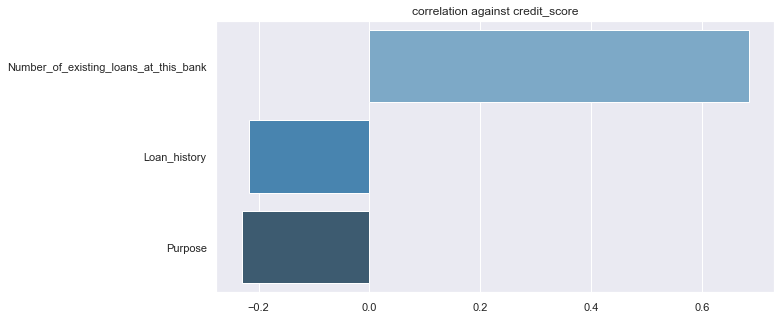

In [52]:
plot_correlations_of_new_variable('credit_score', data_with_credit_score )

We will remove the number of existing loans cols 

In [53]:
data_with_credit_score = data_with_credit_score.drop(['Number_of_existing_loans_at_this_bank'] , axis = 1)

In [54]:
data_with_credit_score

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Has_coapplicant,Has_guarantor,Loan_history,high_risk_applicant,Savings_account_balance,...,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent,average_employed_years,interest_paid,credit_score
0,4.219508,1,4,0,1,0,0,0,0,0,...,0,1,0,0,1,1,0,1.609438,0.246417,5
1,3.135494,1,2,0,1,0,0,1,1,1,...,0,0,1,0,0,1,0,1.252763,0.810008,4
2,3.912023,2,3,1,1,0,0,0,0,1,...,1,1,0,0,1,1,0,1.871802,0.255503,6
3,3.828641,2,4,0,1,0,1,1,0,1,...,2,1,0,0,1,0,0,1.871802,0.747449,3
4,3.988984,2,4,0,1,0,0,2,1,1,...,3,1,0,0,1,0,0,1.252763,0.654363,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.465736,1,4,1,1,0,0,1,0,1,...,2,0,1,0,0,1,0,1.871802,0.358382,5
996,3.713572,1,4,2,1,0,0,1,0,1,...,4,1,0,0,0,1,0,1.252763,0.922885,3
997,3.663562,1,4,0,1,0,0,1,0,1,...,0,1,0,0,1,1,0,1.609438,0.434308,4
998,3.178054,1,4,0,1,0,0,1,1,1,...,0,1,0,0,1,0,0,1.252763,1.151900,4


c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='credit_score', ylabel='Density'>

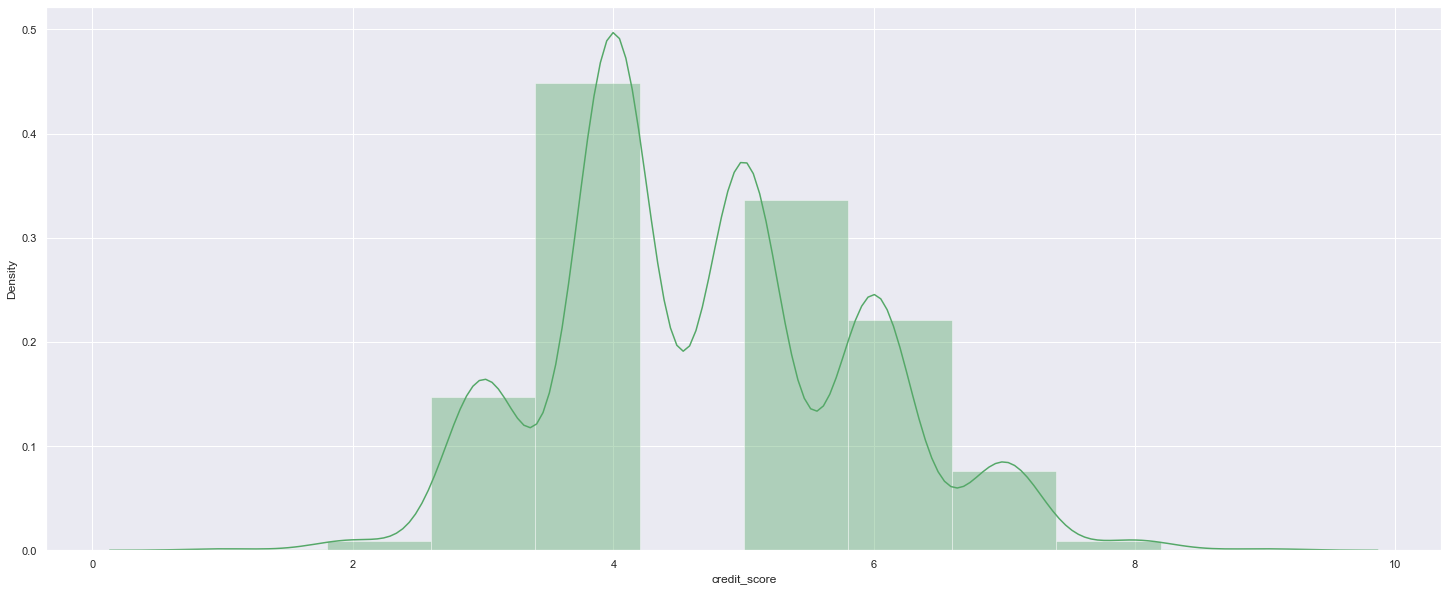

In [55]:
sns.distplot(data_with_credit_score['credit_score'], color = 'g', bins = 10)

It already seems to be normally distributed

### Hence, we derieved 2 columns Interest and Credit score and are now proceeding towards Model Creation

In [56]:
data_with_credit_score.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Has_coapplicant', 'Has_guarantor', 'Loan_history',
       'high_risk_applicant', 'Savings_account_balance', 'Property', 'Purpose',
       'Gender_male', 'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years',
       'interest_paid', 'credit_score'],
      dtype='object')

In [57]:
ordinal = ['Employment_status', 'Foreign_worker',
       'Has_coapplicant', 'Has_guarantor', 'Loan_history',
       'high_risk_applicant', 'Savings_account_balance', 'Property', 'Purpose',
       'Gender_male', 'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', ]
for i in ordinal:
       data_with_credit_score[i] = data_with_credit_score[i].astype('object')

In [58]:
data_with_credit_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Primary_applicant_age_in_years             1000 non-null   float64
 1   Number_of_dependents                       1000 non-null   int64  
 2   Years_at_current_residence                 1000 non-null   int64  
 3   Employment_status                          1000 non-null   object 
 4   Foreign_worker                             1000 non-null   object 
 5   Has_coapplicant                            1000 non-null   object 
 6   Has_guarantor                              1000 non-null   object 
 7   Loan_history                               1000 non-null   object 
 8   high_risk_applicant                        1000 non-null   object 
 9   Savings_account_balance                    1000 non-null   object 
 10  Property                 

In [59]:
data_with_credit_score.to_csv('Data/Preprocessed/final.csv', index= False)